* [Korea Income and Welfare | Kaggle](https://www.kaggle.com/hongsean/korea-income-and-welfare)

* [KOWEPS - Korea Welfare Panel Study](https://www.koweps.re.kr:442/eng/data/guide/list.do)


There are 14 columns in data;

* id
* year : study conducted
* wave : from wave 1st in 2005 to wave 14th in 2018
* region: 1) Seoul 2) Kyeong-gi 3) Kyoung-nam 4) Kyoung-buk 5) Chung-nam 6) Gang-won &. Chung-buk 7) Jeolla & Jeju
* income: yearly income in M KRW(Million Korean Won. 1100 KRW = 1 USD)
* family_member: no. of family members
* gender: 1) male 2) female
* year_born
* education_level: 1) no education(under 7 yrs-old) 2) no education(7 & over 7 yrs-old) 3) elementary 4) middle school 5) high school 6) college 7) university degree 8) MA 9) doctoral degree
* marriage: marital status. 1) not applicable (under 18) 2) married 3) separated by death 4) separated 5) not married yet 6) others
* religion: 1) have religion 2) do not have
* occupation: this will be provided in separated code book
* company_size
* reasonnoneworker: 1) no capable 2) in military service 3) studying in school 4) prepare for school 5) prepare to apply job 6) house worker 7) caring kids at home 8) nursing 9) giving-up economic activities 10) no intention to work 11) others

In [4]:
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv("data/Korea Income and Welfare.csv")
df.shape

(92857, 14)

In [7]:
df.head()

id  year  wave  region  income  family_member  gender  year_born  \
0  10101  2005     1       1   614.0              1       2       1936   
1  10101  2011     7       1   896.0              1       2       1936   
2  10101  2012     8       1  1310.0              1       2       1936   
3  10101  2013     9       1  2208.0              1       2       1936   
4  10101  2014    10       1   864.0              1       2       1936   

   education_level  marriage  religion occupation company_size  \
0                2         2         2                           
1                2         2         2                           
2                2         2         2                           
3                2         2         2                           
4                2         2         2                           

  reason_none_worker  
0                  8  
1                 10  
2                 10  
3                  1  
4                 10

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92857 non-null  int64  
 1   year                92857 non-null  int64  
 2   wave                92857 non-null  int64  
 3   region              92857 non-null  int64  
 4   income              92857 non-null  float64
 5   family_member       92857 non-null  int64  
 6   gender              92857 non-null  int64  
 7   year_born           92857 non-null  int64  
 8   education_level     92857 non-null  int64  
 9   marriage            92857 non-null  int64  
 10  religion            92857 non-null  int64  
 11  occupation          92857 non-null  object 
 12  company_size        92857 non-null  object 
 13  reason_none_worker  92857 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 9.9+ MB


In [9]:
df.isnull().sum()

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

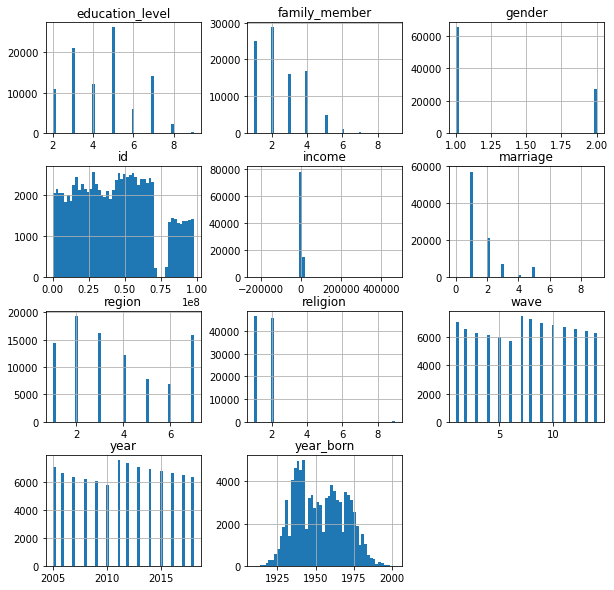

In [13]:
h = df.hist(figsize=(10, 10), bins=50)

In [66]:
px.histogram(df, x="year_born", marginal="box")

In [15]:
df["gender"].value_counts(normalize=True)

1    0.703684
2    0.296316
Name: gender, dtype: float64

In [24]:
rg = df.groupby(["region", "gender"])["id"].count().unstack()
rg

gender      1     2
region             
1       10268  4169
2       14651  4702
3       11085  5069
4        8011  4194
5        5795  2048
6        5105  1822
7       10427  5511

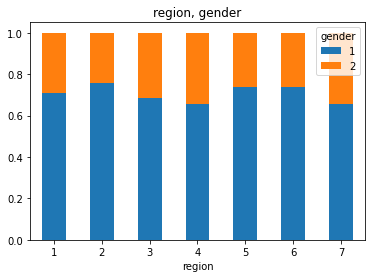

In [46]:
rgn = df.groupby(["region"])["gender"].value_counts(normalize=True)
rgn.unstack().plot.bar(stacked=True, title="region, gender", rot=0)

In [63]:
df_rgn = rgn.round(2).rename("percent").reset_index()
df_rgn

region  gender  percent
0        1       1     0.71
1        1       2     0.29
2        2       1     0.76
3        2       2     0.24
4        3       1     0.69
5        3       2     0.31
6        4       1     0.66
7        4       2     0.34
8        5       1     0.74
9        5       2     0.26
10       6       1     0.74
11       6       2     0.26
12       7       1     0.65
13       7       2     0.35

In [64]:
px.bar(df_rgn, x="region", y="percent", color="gender", text="percent")